# Bearings dataset EDA

In this note book I investigate dataset charachtristics in the dataset. This is the 2nd step in CRISP-DM, "data understanding" and helps in model selection and analysis

In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

## Loading Datasets

In [36]:
data01_path = './Datasets/bearings01/NB.csv'
data02_path = './Datasets/bearings01/IR - 7.csv'
data03_path = './Datasets/bearings01/IR - 21.csv'
data04_path = './Datasets/bearings01/OR - 7.csv'
data05_path = './Datasets/bearings01/OR - 21.csv'

it's better to preprocess datasets separately. This can help us understand each one better, prevent data leakage which may happen during normalization or standardization, and also prevents domminance of one or more datasets during scaling.

We can develop a function that does the proprocessing as a pipeline step,  but first let us do this in an adhoc to analyze each dataset indipendently.

In [37]:
df_normal = pd.read_csv(data01_path)
df_ir07 = pd.read_csv(data02_path)
df_ir21 = pd.read_csv(data03_path)
df_or07 = pd.read_csv(data04_path)
df_or21 = pd.read_csv(data05_path)

In [38]:
print("IR-07 fault dataset head: \n", df_ir07.head())
print("IR-21 fault dataset head: \n", df_ir21.head())

IR-07 fault dataset head: 
          DE        FE
0 -0.093238 -0.029175
1  0.187288 -0.186347
2  0.217663 -0.341260
3  0.070172 -0.160871
4  0.100385  0.179978
IR-21 fault dataset head: 
          DE        FE
0 -0.402027 -0.058965
1  0.548219  0.221480
2  0.931565  0.044173
3 -0.218881 -0.017669
4 -1.079788  0.187580


## normal signal

In [90]:
signal_columns = {'DriveEndAcc', 'FanEndAcc'}
fault_type_names = ['normal', 'ir07', 'ir21', 'or07', 'or21']
# df_normal.columns = signal_columns
# df_ir07.columns = signal_columns
# We will enumerate classes then we will use one-hot-encoding
# df_normal['fault'] = 0

In [ ]:
#organize datasets and add fault type column
for i, df_fault_name in enumerate(fault_type_names):
    df_name = f"df_{df_fault_name}"
    globals()[df_name].columns = signal_columns
    globals()[df_name]['fault'] = df_fault_name
    globals()[df_name]['fault'] = globals()[df_name]['fault'].astype('string')

### check stats and nulls

#### Check for stats and nulls

In [43]:
print(df_normal.info())
print(df_normal.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121155 entries, 0 to 121154
Data columns (total 3 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   FanEndAcc    121155 non-null  float64
 1   DriveEndAcc  121155 non-null  float64
 2   fault        121155 non-null  string 
dtypes: float64(2), string(1)
memory usage: 2.8 MB
None
           FanEndAcc    DriveEndAcc
count  121155.000000  121155.000000
mean        0.011768       0.032724
std         0.063400       0.065195
min        -0.275998      -0.213056
25%        -0.030249      -0.013355
50%         0.014186       0.031024
75%         0.056118       0.077045
max         0.359236       0.303867


In [44]:
print(df_ir07.info())
print(df_ir07.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121155 entries, 0 to 121154
Data columns (total 3 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   FanEndAcc    121155 non-null  float64
 1   DriveEndAcc  121155 non-null  float64
 2   fault        121155 non-null  string 
dtypes: float64(2), string(1)
memory usage: 2.8 MB
None
           FanEndAcc    DriveEndAcc
count  121155.000000  121155.000000
mean        0.004557       0.033972
std         0.299474       0.232675
min        -1.425531      -0.895782
25%        -0.148872      -0.120602
50%         0.001299       0.032051
75%         0.153176       0.187683
max         1.639620       0.957213


In [45]:
print(df_ir21.info())
print(df_ir21.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121155 entries, 0 to 121154
Data columns (total 3 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   FanEndAcc    121155 non-null  float64
 1   DriveEndAcc  121155 non-null  float64
 2   fault        121155 non-null  string 
dtypes: float64(2), string(1)
memory usage: 2.8 MB
None
           FanEndAcc    DriveEndAcc
count  121155.000000  121155.000000
mean        0.003434       0.032252
std         0.488680       0.170053
min        -3.124034      -0.832707
25%        -0.215633      -0.071087
50%        -0.004873       0.030818
75%         0.205074       0.133135
max         3.623116       1.010836


In [46]:
print(df_or07.info())
print(df_or07.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121155 entries, 0 to 121154
Data columns (total 3 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   FanEndAcc    121155 non-null  float64
 1   DriveEndAcc  121155 non-null  float64
 2   fault        121155 non-null  string 
dtypes: float64(2), string(1)
memory usage: 2.8 MB
None
           FanEndAcc    DriveEndAcc
count  121155.000000  121155.000000
mean        0.003920       0.032344
std         0.570418       0.225159
min        -3.082207      -0.949405
25%        -0.179897      -0.099440
50%         0.003249       0.033489
75%         0.188831       0.162515
max         3.101293       1.049873


In [47]:
print(df_or21.info())
print(df_or21.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121155 entries, 0 to 121154
Data columns (total 3 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   FanEndAcc    121155 non-null  float64
 1   DriveEndAcc  121155 non-null  float64
 2   fault        121155 non-null  string 
dtypes: float64(2), string(1)
memory usage: 2.8 MB
None
           FanEndAcc    DriveEndAcc
count  121155.000000  121155.000000
mean        0.003550       0.032730
std         0.558975       0.196337
min        -6.653343      -1.856076
25%        -0.114111      -0.050542
50%         0.003655       0.033284
75%         0.120202       0.117109
max         6.652937       2.090911


There is no Nulls in the datasets

#### Plot stats

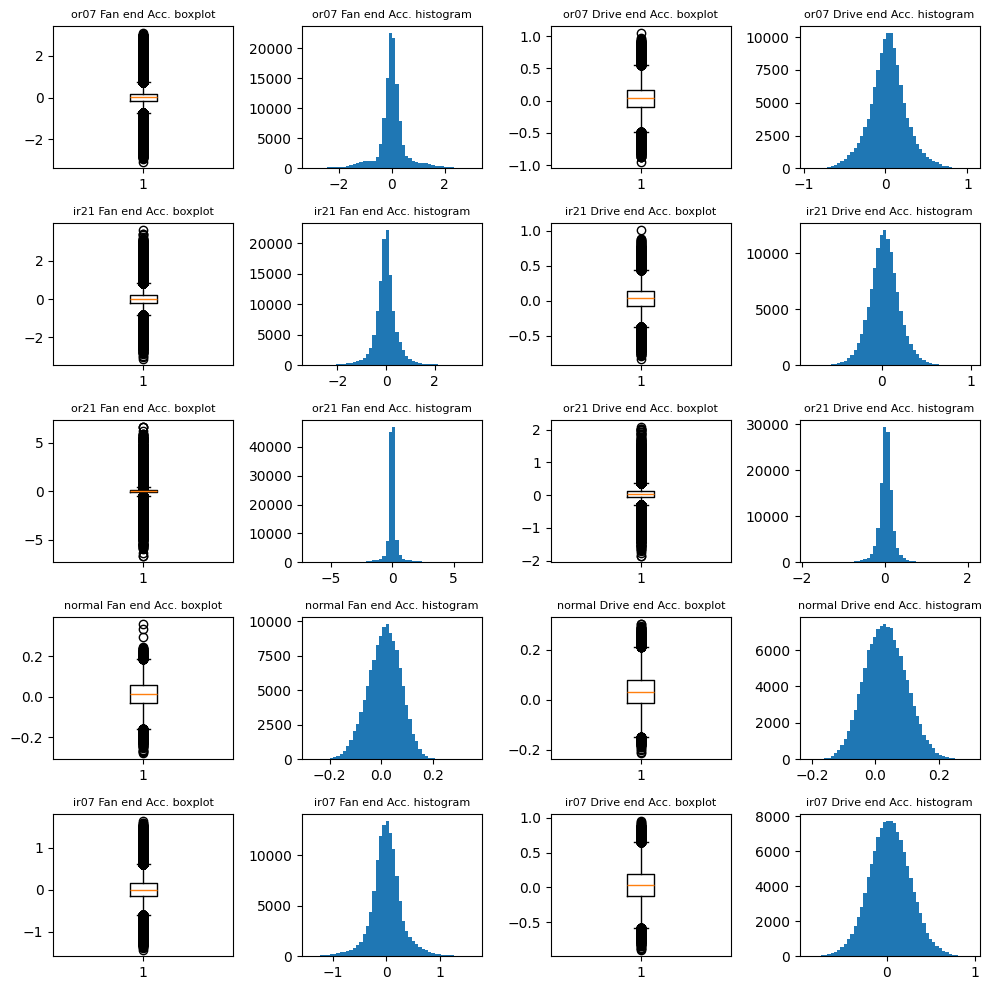

In [52]:
fig, ax = plt.subplots(5,4, figsize=(10,10))
for i, fault_name in enumerate(fault_type_names):
    df_name = f"df_{fault_name}"
    ax[i,0].boxplot(globals()[df_name]['FanEndAcc'])
    ax[i,0].set_title(f'{fault_name} Fan end Acc. boxplot', fontsize = 8)
    ax[i,1].hist(globals()[df_name]['FanEndAcc'], bins=50)
    ax[i,1].set_title(f'{fault_name} Fan end Acc. histogram', fontsize = 8)
    ax[i,2].boxplot(globals()[df_name]['DriveEndAcc'])
    ax[i,2].set_title(f'{fault_name} Drive end Acc. boxplot', fontsize = 8)
    ax[i,3].hist(globals()[df_name]['DriveEndAcc'], bins=50)
    ax[i,3].set_title(f'{fault_name} Drive end Acc. histogram', fontsize = 8)
plt.tight_layout()
plt.show()

In general we see a relatively normal histograms in all. Additionally, we can notice a handful of outliers (three of then in NB fan end acc.), which I decide to let it be like that.

However, OR21 accelerator data distribution is very sharp around zero. OR21 Fan end is the sharpest. 

1. is it due to very low vibration? if yes what is the reason? is it a normal output due to the fault or a fault in measurement?

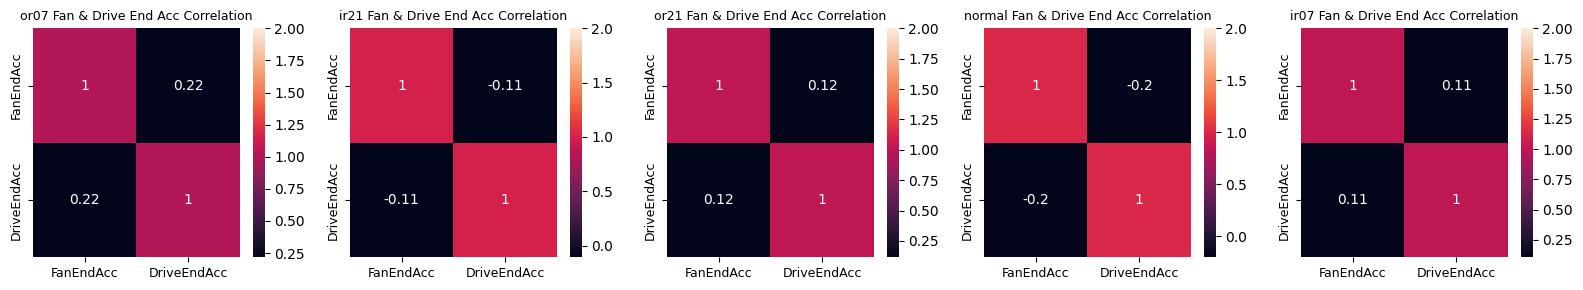

In [67]:
fig, ax = plt.subplots(1, 5, figsize=(16, 3))

for i, fault_name in enumerate(fault_type_names):
    df_name = f"df_{fault_name}"
    # Retrieve the current dataframe using globals()
    curr_df = globals()[df_name]
    
    # Calculate the Pearson correlation matrix for the two columns
    corr_matrix = curr_df[['FanEndAcc', 'DriveEndAcc']].corr(method='pearson')
    
    # Plot the heatmap on the appropriate subplot axis
    sns.heatmap(corr_matrix, annot=True, vmax=2, ax=ax[i])
    ax[i].set_title(f'{fault_name} Fan & Drive End Acc Correlation', fontsize=9)
    
    ax[i].tick_params(axis='x', labelsize=9, rotation = 0)
    ax[i].tick_params(axis='y', labelsize=9, rotation = 90)

plt.tight_layout()
plt.show()


### check duplicates

**Should I Remove Duplicates in an Accelerometer-Based Bearing Fault Dataset?**

***How Do Duplicates Arise?***

*Steady-state signals:* If the system operates under stable conditions, some measurements might appear identical across consecutive timestamps.

*Sensor precision limits:* If sensor resolution is limited, small changes might be rounded, leading to identical readings.

*Sampling effects:* Data might be sampled at a high rate, leading to near-identical readings due to minimal change in vibration levels.

*Data preprocessing issues:* If data has been preprocessed (e.g., resampled, interpolated, or aggregated), duplicates might appear.

***Does Removing Duplicates Affect Fault Detection?***

If the dataset is showing a trend, removing duplicates could be a bad move because:

*Fault evolution might be gradual:* Removing duplicates could eliminate important information about how a fault develops over time.

*Temporal relationships matter:* Vibration patterns in bearings often involve subtle changes over time, which duplicates may represent.

*Pattern recognition models rely on time-series data:* If you plan to use Machine Learning (e.g., CNNs, LSTMs), removing duplicates could disrupt meaningful patterns.


However, if duplicates do not provide new information (e.g., they arise from artifacts of data collection), then removing them might help reduce data size without losing useful signals.

In [68]:
for i, fault_name in enumerate(fault_type_names):
    df_name = f"df_{fault_name}"
    print(f'number of duplicates in the {fault_name} dataset: ', sum(globals()[df_name].duplicated(subset = signal_columns)))

number of duplicates in the or07 dataset:  986
number of duplicates in the ir21 dataset:  1106
number of duplicates in the or21 dataset:  2407
number of duplicates in the normal dataset:  6519
number of duplicates in the ir07 dataset:  422


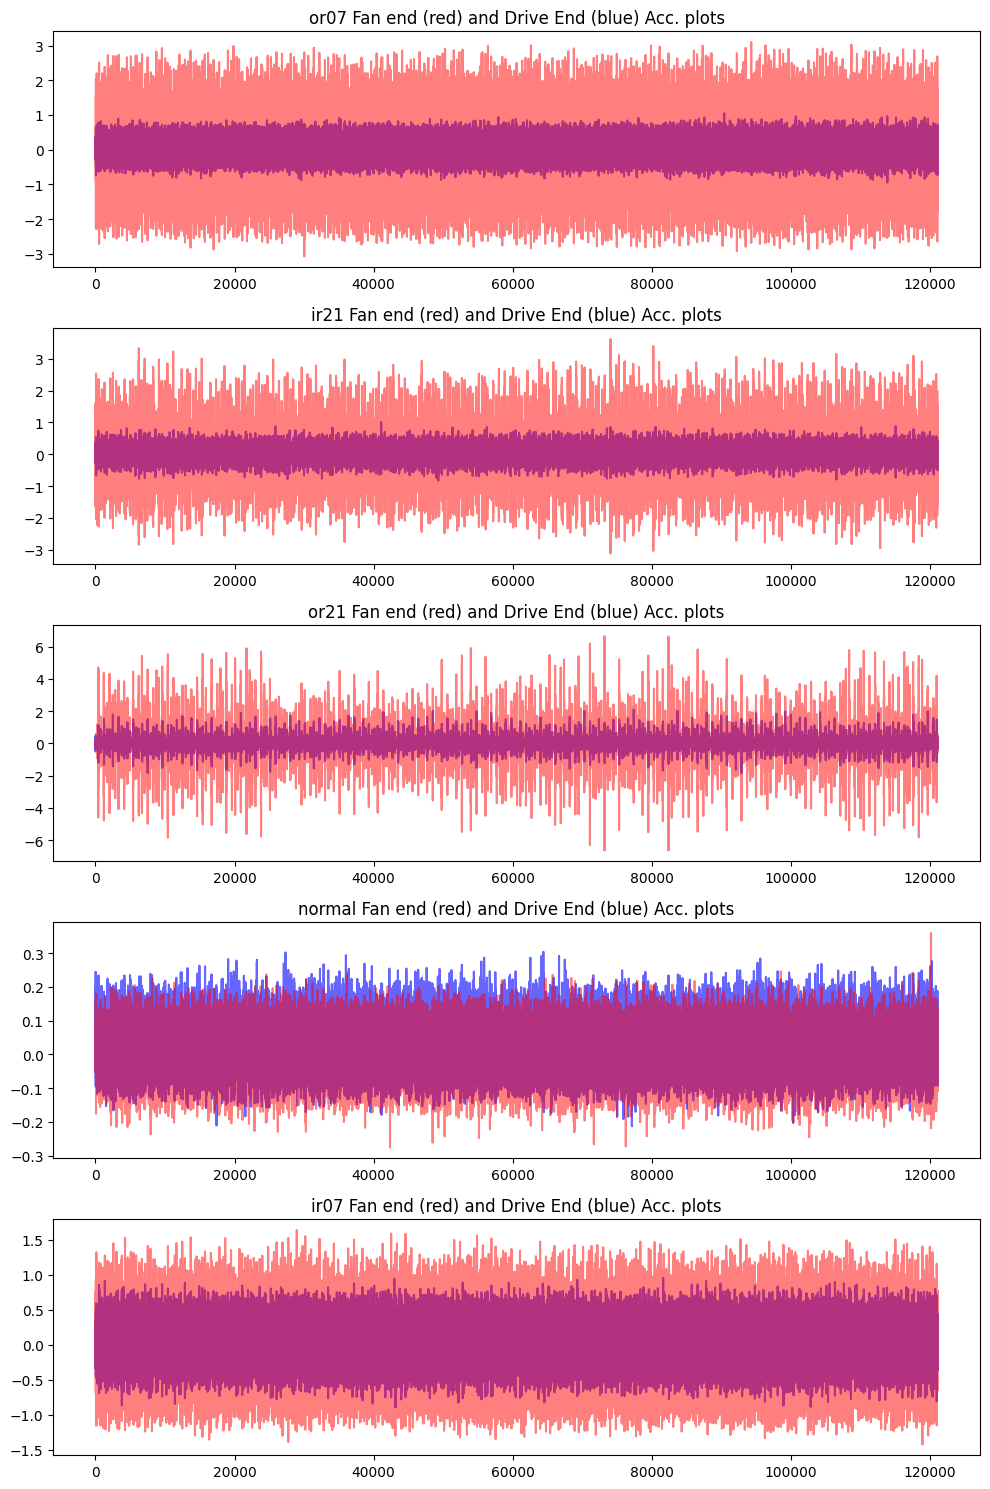

In [74]:
fig, ax = plt.subplots(5,1, figsize=(10,15))
for i, fault_name in enumerate(fault_type_names):
    df_name = f"df_{fault_name}"
    df = globals()[df_name]
    ax[i].plot(df.index, df['DriveEndAcc'], color='blue', alpha=0.6)#DriveEnd Acc. is Blue
    ax[i].plot(df.index, df['FanEndAcc'], color='red', alpha=0.5)#FanEnd Acc. is red
    ax[i].set_title(f'{fault_name} Fan end (red) and Drive End (blue) Acc. plots', fontsize = 12)

plt.tight_layout()
plt.show()

instead of removing duplicates lets first understand the duplication pattern and find the possible reason for that.
first I create a column that marks all duplicates. Then a column that marks duplicates by grouping them. In this way I can plot duplicates related to each group and compare them with the data pattern.

In [77]:
# after this block we have a duplicates_only dataframe for each of the faults
for i, fault_name in enumerate(fault_type_names):
    df_name = f"df_{fault_name}"
    df = globals()[df_name]
    df['duplicated'] = np.where(df.duplicated(subset=signal_columns,keep=False), 1, 0)
    df['duplicate_group'] = df[df['duplicated']==1].groupby(['DriveEndAcc', 'FanEndAcc']).ngroup()+1
    df['duplicate_group'] = df['duplicate_group'].fillna(0)
    globals()[f"df_{fault_name}_duplicates_only"] = df[df['duplicated']==1]
    print(f"{fault_name} dataframe describe. notice the duplicate related columns")
    print(df.describe())
    print('\n')

or07 dataframe describe. notice the duplicate related columns
           FanEndAcc    DriveEndAcc     duplicated  duplicate_group
count  121155.000000  121155.000000  121155.000000    121155.000000
mean        0.003920       0.032344       0.016169         7.862672
std         0.570418       0.225159       0.126127        70.945394
min        -3.082207      -0.949405       0.000000         0.000000
25%        -0.179897      -0.099440       0.000000         0.000000
50%         0.003249       0.033489       0.000000         0.000000
75%         0.188831       0.162515       0.000000         0.000000
max         3.101293       1.049873       1.000000       973.000000


ir21 dataframe describe. notice the duplicate related columns
           FanEndAcc    DriveEndAcc     duplicated  duplicate_group
count  121155.000000  121155.000000  121155.000000    121155.000000
mean        0.003434       0.032252       0.018200        10.021386
std         0.488680       0.170053       0.133674        

While the numbe rof duplicares is 6519 and the enumber of duplicate groups is 6192, 327 have more than two repeatitions.


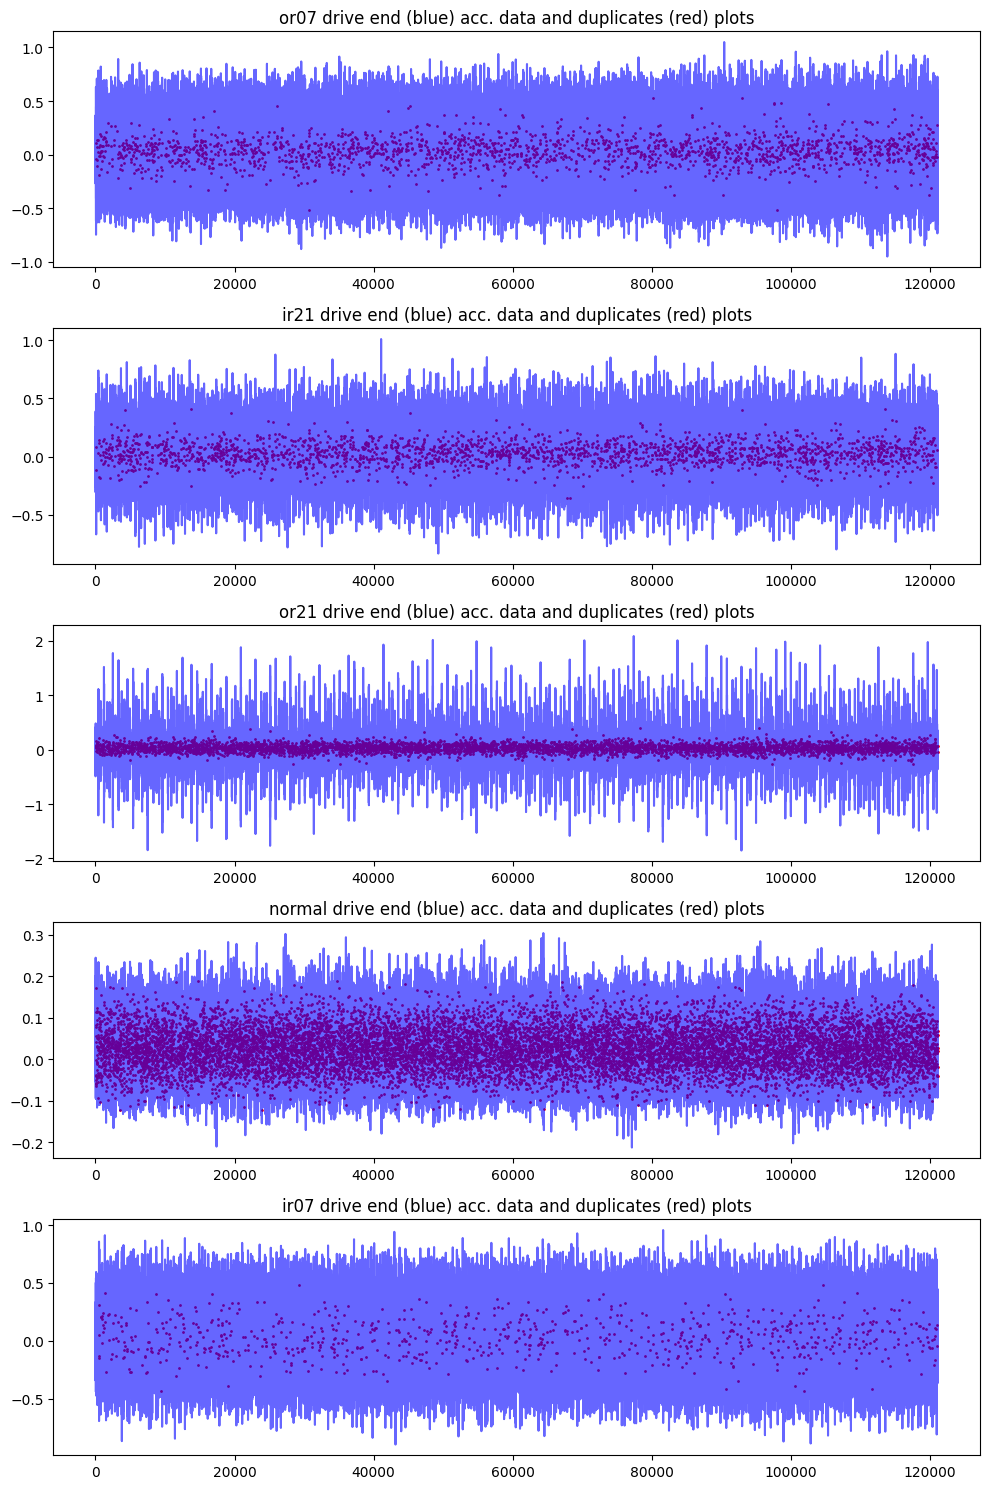

In [86]:
base_acc = 'DriveEndAcc' # 'FanEndAcc'
fig, ax = plt.subplots(5,1, figsize=(10,15))
for i, fault_name in enumerate(fault_type_names):
    df_name = f"df_{fault_name}"
    df = globals()[df_name]
    duplicates_only = globals()[f"df_{fault_name}_duplicates_only"]
    ax[i].plot(df.index, df[base_acc], color='blue', alpha=0.6)#DriveEnd Acc. is Blue
    ax[i].scatter(duplicates_only.index, duplicates_only['DriveEndAcc'], color='red', s=1)#Duplicates are red
    # ax[i].scatter(duplicates_only.index, duplicates_only['FanEndAcc'], color='green', s=1)#Duplicates are red
    ax[i].set_title(f'{fault_name} drive end (blue) acc. data and duplicates (red) plots', fontsize = 12)
plt.tight_layout()
plt.show()

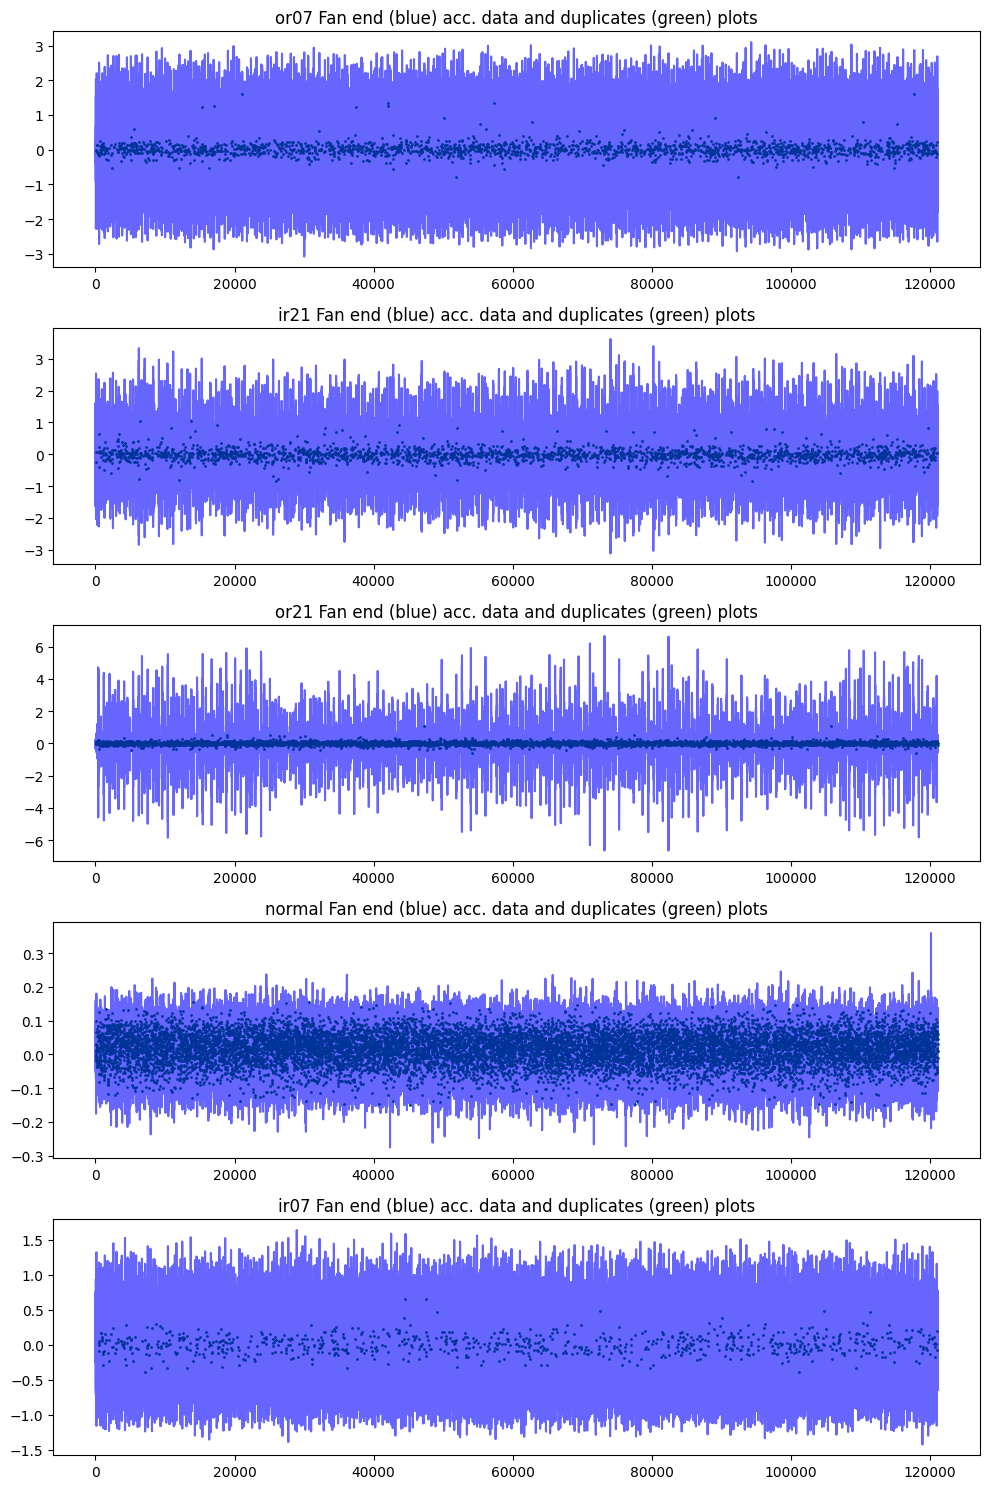

In [87]:
base_acc = 'FanEndAcc'#'DriveEndAcc'
fig, ax = plt.subplots(5,1, figsize=(10,15))
for i, fault_name in enumerate(fault_type_names):
    df_name = f"df_{fault_name}"
    df = globals()[df_name]
    duplicates_only = globals()[f"df_{fault_name}_duplicates_only"]
    ax[i].plot(df.index, df[base_acc], color='blue', alpha=0.6)#DriveEnd Acc. is Blue
    # ax[i].scatter(duplicates_only.index, duplicates_only['DriveEndAcc'], color='red', s=1)#Duplicates are red
    ax[i].scatter(duplicates_only.index, duplicates_only['FanEndAcc'], color='green', s=1)#Duplicates are red
    ax[i].set_title(f'{fault_name} Fan end (blue) acc. data and duplicates (green) plots', fontsize = 12)
plt.tight_layout()
plt.show()

Duplicates look scattered in the plot. Additionally, they also are not at the min or max values of the plot. So we can infer that:

1. duplicates are not due to sensor saturation
2. they probably are not due to drive stall(need more investigation)

but let's do not quit here, we can create a tool to visualize each group!

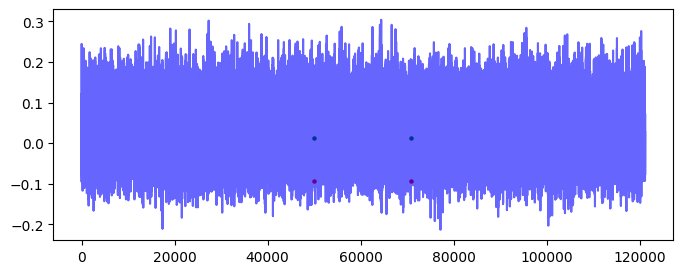

In [92]:
# play with duplicate_groups to get a grasp of duplicates
duplicate_group = 32
fault_name = fault_type_names[0] #['normal', 'ir07', 'ir21', 'or07', 'or21']


df_name = f"df_{fault_name}"
df = globals()[df_name]
duplicates_only = globals()[f"df_{fault_name}_duplicates_only"]
plt.figure(figsize = (8,3))
plt.plot(df.index, df['DriveEndAcc'], color='blue', alpha=0.6)#DriveEnd Acc. is Blue
plt.scatter(df[df['duplicate_group']==duplicate_group].index, df[df['duplicate_group']==duplicate_group]['DriveEndAcc'], color='red', s=5)#Duplicates are red
plt.scatter(df[df['duplicate_group']==duplicate_group].index, df[df['duplicate_group']==duplicate_group]['FanEndAcc'], color='green', s=5)#Duplicates are red
plt.show()

This experiment confirms previous results. Since dulicated values are not in consecuitive indexes, they are not due to sensor output saturation or slow output slope (rise time/fall time).
I infer that at least most of the cases are random or injected randomly!

**in case of time series analysis I prefer not to remove duplicates in this dataset.**

**for classifications and any model that does not analyze trend, duplicates should be removed.**

In [96]:
import pickle

for i, fault_name in enumerate(fault_type_names):
    df_name = f"df_{fault_name}"
    df = globals()[df_name]
    with_duplicates = f"{df_name}_with_duplicates"
    without_duplicates = f"{df_name}_without_duplicates"
    
    globals()[with_duplicates] = df.iloc[:,[0,1]]
    with open(f"./Datasets/pickles/{with_duplicates}.pk1",'wb') as file:
        pickle.dump(globals()[with_duplicates], file)
        
    globals()[without_duplicates] = df.iloc[:,[0,1]].drop_duplicates(subset=signal_columns, keep='first').reset_index(drop=True)
    with open(f"./Datasets/pickles/{without_duplicates}.pk1",'wb') as file:
        pickle.dump(globals()[without_duplicates], file)